RANDOM FOREST CLASSIFICATION 

 - https://www.datacamp.com/tutorial/random-forests-classifier-python

Come funziona la classificazione casuale delle foreste

Immagina di avere un problema complesso da risolvere e riunisci un gruppo di esperti di diversi campi per fornire il loro contributo. Ogni esperto fornisce la propria opinione in base alla propria competenza ed esperienza. Quindi, gli esperti voterebbero per arrivare a una decisione finale.

In una classificazione casuale delle foreste, vengono creati più alberi decisionali utilizzando diversi sottoinsiemi casuali di dati e caratteristiche. Ogni albero decisionale è come un esperto, che fornisce la sua opinione su come classificare i dati. Le previsioni vengono fatte calcolando la previsione per ogni albero decisionale, quindi prendendo il risultato più popolare. (Per la regressione, le previsioni utilizzano invece una tecnica di media)

In [1]:
# importiamo le librerie necessarie
import pandas as pd
import numpy as np

# Importiamo le librerie per la classificazione e la valutazione
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# importiamo le librerie per la visualizzazione degli alberi di decisione
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [2]:
# importiamo il dataset 
bank_data = pd.read_csv('bank-full.csv', sep=';')

# visualizziamo le prime 5 righe del dataset
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


Questo codice è scritto in Python e viene utilizzato per mappare valori categorici a valori numerici in un DataFrame Pandas chiamato bank_data.
 - La prima riga di codice associa i valori nella colonna 'default' del DataFrame a valori numerici.
 - Il dizionario passato alla funzione map() associa i valori stringa 'no' e 'sconosciuto' a 0 e il valore stringa 'yes' a 1.
 - Ciò significa che tutti i valori "no" e "sconosciuto" nella colonna "default" verranno sostituiti con 0 e tutti i valori "sì" verranno sostituiti con 1.
 - La seconda riga di codice associa i valori nella colonna 'y' del DataFrame a valori numerici.
 - Il dizionario passato alla funzione map() associa il valore stringa 'no' a 0 e il valore stringa 'yes' a 1.
 - Ciò significa che tutti i valori "no" nella colonna "y" verranno sostituiti con 0 e tutti i valori "sì" verranno sostituiti con 1.
 - Nel complesso, questo codice viene utilizzato per convertire i dati categorici in dati numerici, spesso necessari per il corretto funzionamento degli algoritmi di machine learning.

In [3]:
# usiamo solo le colonne 'age', 'balance', 'duration', 'campaign', 'y'
bank_data = bank_data[['age', 'default', 'balance', 'duration', 'campaign', 'y']]

In [4]:
bank_data['default'] = bank_data['default'].map({'no':0,'yes':1,'unknown':0})
bank_data['y'] = bank_data['y'].map({'no':0,'yes':1})

In [5]:
# dividiamo il dataset in train e test escludendo la variabile target
X = bank_data.drop('y', axis=1)
y = bank_data['y']

# dividiamo il dataset in train e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234, stratify=y)

Accuracy:  0.881156001179593
Precision:  0.9060565697719972
Recall:  0.9655172413793104


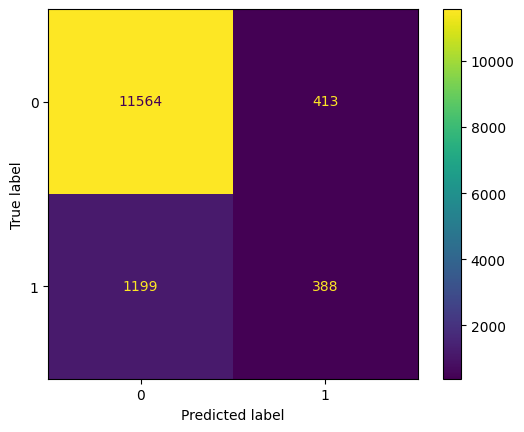

In [14]:
# creiamo il modello
rf = RandomForestClassifier(random_state=42)

# addestriamo il modello
rf.fit(X_train, y_train)

# effettuiamo le predizioni sul test set
y_pred = rf.predict(X_test)

# rappresentiamo la matrice di confusione
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot()

# valutiamo le performance del modello
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', accuracy)

# valutiamo le performance del modello
precision = precision_score(y_test, y_pred, pos_label=0)
print('Precision: ', precision)

# valutiamo le performance del modello
recall = recall_score(y_test, y_pred, pos_label=0)
print('Recall: ', recall)


In [7]:
# visualizziamo gli estimatori
rf.estimators_

[DecisionTreeClassifier(max_features='sqrt', random_state=1608637542),
 DecisionTreeClassifier(max_features='sqrt', random_state=1273642419),
 DecisionTreeClassifier(max_features='sqrt', random_state=1935803228),
 DecisionTreeClassifier(max_features='sqrt', random_state=787846414),
 DecisionTreeClassifier(max_features='sqrt', random_state=996406378),
 DecisionTreeClassifier(max_features='sqrt', random_state=1201263687),
 DecisionTreeClassifier(max_features='sqrt', random_state=423734972),
 DecisionTreeClassifier(max_features='sqrt', random_state=415968276),
 DecisionTreeClassifier(max_features='sqrt', random_state=670094950),
 DecisionTreeClassifier(max_features='sqrt', random_state=1914837113),
 DecisionTreeClassifier(max_features='sqrt', random_state=669991378),
 DecisionTreeClassifier(max_features='sqrt', random_state=429389014),
 DecisionTreeClassifier(max_features='sqrt', random_state=249467210),
 DecisionTreeClassifier(max_features='sqrt', random_state=1972458954),
 DecisionTreeC

In [8]:
# visualizziamo i primi tre alberi di decisione
#for i in range(3):
#    tree = rf.estimators_[i]                                # selezioniamo l'albero di decisione i-esimo prendendolo dalla lista di alberi di decisione (estimators_)
#    dot_data = export_graphviz(
#                                tree,                       # modello di albero di decisione
#                                out_file=None,              # nessun file di output
#                                feature_names=X.columns,    # nome delle variabili
#                                filled=True,                # coloriamo i nodi
#                                rounded=True,               # bordi arrotondati
#                                special_characters=True     # caratteri speciali
#                            )
#    graph = graphviz.Source(dot_data)                       # creiamo il grafico
#    display(graph)                                          # visualizziamo il grafico

Il codice seguente utilizza RandomizedSearchCV di Scikit-Learn, che cercherà in modo casuale i parametri all'interno di un intervallo per iperparametro. Definiamo gli iperparametri da usare e i loro intervalli nel dizionario param_dist. Nel nostro caso, stiamo usando:

n_estimators: il numero di alberi decisionali nella foresta. L'aumento di questo iperparametro generalmente migliora le prestazioni del modello, ma aumenta anche il costo computazionale dell'addestramento e della previsione.
max_depth: la profondità massima di ogni albero decisionale nella foresta. L'impostazione di un valore più alto per max_depth può portare a un overfitting mentre un'impostazione troppo bassa può portare a un underfitting.

RandomizedSearchCV addestrerà molti modelli (definiti da n_iter_ e salverà ciascuno come variabile, il codice seguente crea una variabile per il modello migliore e stampa gli iperparametri. In questo caso, non abbiamo passato un sistema di punteggio alla funzione, quindi è predefinito all'accuratezza. Questa funzione utilizza anche la convalida incrociata, il che significa che suddivide i dati in cinque gruppi di uguali dimensioni e utilizza 4 per addestrare e 1 per testare il risultato. Farà scorrere ogni gruppo e fornirà un punteggio di accuratezza, la cui media è pari a trovare il modello migliore.

In [9]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Creiamo un oggetto random forest
rf = RandomForestClassifier()

# Usiamo RandomizedSearchCV per trovare i migliori parametri
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Addestriamo il modello con i migliori parametri
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f1591d16ef0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f158fc525c0>})

In [10]:
# Creiamo una variabile con il modello migliore
best_rf = rand_search.best_estimator_

# Printiamo i parametri migliori
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 6, 'n_estimators': 212}


Diamo un'occhiata alla matrice di confusione. Questo rappresenta ciò che il modello ha previsto rispetto a quale fosse la previsione corretta. Possiamo usarlo per capire il compromesso tra falsi positivi (in alto a destra) e falsi negativi (in basso a sinistra) Possiamo tracciare la matrice di confusione usando questo codice:

Accuracy:  0.8901503981126512
Precision:  0.9021397346422272
Recall:  0.9821324204725724


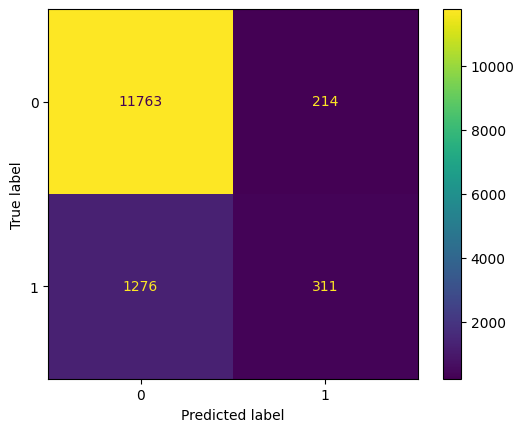

In [13]:
# generiamo le predizioni sul test set
y_pred = best_rf.predict(X_test)

# Creiamo una confusion matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

# valutiamo le performance del modello
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', accuracy)

# valutiamo le performance del modello
precision = precision_score(y_test, y_pred, pos_label=0)
print('Precision: ', precision)

# valutiamo le performance del modello
recall = recall_score(y_test, y_pred, pos_label=0)
print('Recall: ', recall)

Il codice seguente traccia l'importanza di ciascuna caratteristica, utilizzando il punteggio interno del modello per trovare il modo migliore per suddividere i dati all'interno di ciascun albero decisionale.

<AxesSubplot:>

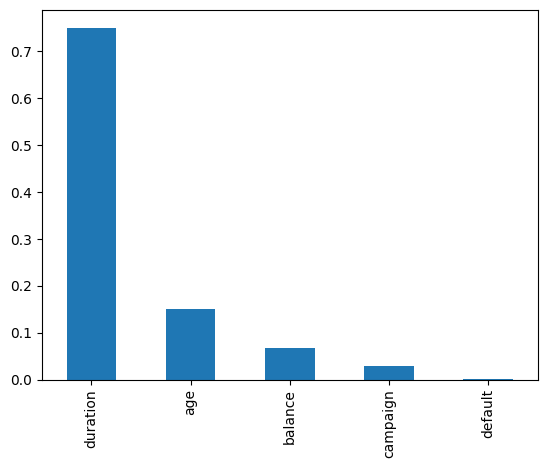

In [12]:
# Crea una serie contenente l'importanza delle funzionalità dal modello e i nomi delle funzionalità dai dati di addestramento
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plotti un grafico a barre
feature_importances.plot.bar()